In [26]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import approx_fprime as GradientDescent

xy = np.array([3.0, 2.0])

def xy_to_rTheta(rTheta):
    r = rTheta[0]
    theta = rTheta[1]
    return np.array([2*r*np.cos(theta), 2*r*np.sin(theta)])

def diff(rtheta):
    x, y = xy_to_rTheta(rtheta)
    dx = x-xy[0]
    dy = y-xy[1]
    return dx*dx + dy*dy

def compute_grad(rTheta, natural):
    gradent = GradientDescent(rTheta, diff, epsilon = 10**-5)
    if natural==1:
        G = np.array([[1.0, 0.0],[0.0, rTheta[0]**2]])
        gradent = np.matmul(np.linalg.inv(G), gradent)
    return gradent / np.linalg.norm(gradent)

def compute_finalGD(natural):
    rTheta = np.array([0.5, np.pi*3/4.])
    rTheta2 = [rTheta]
    alpha = 0.002

    while diff(rTheta) >  0.0003:
        rTheta = rTheta - alpha * compute_grad(rTheta, natural)
        rTheta2.append(rTheta)
        xs, ys = zip(*map(xy_to_rTheta, rTheta2))       
    plt.plot(xs, ys)
    plt.xlabel("x values")
    plt.ylabel("y values")

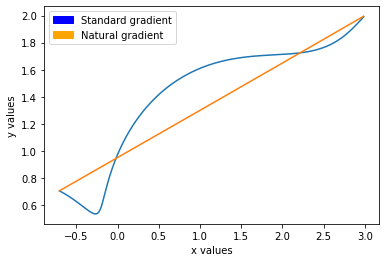

[3. 2.]
[0.5        2.35619449]


In [27]:
rTheta = np.array([0.5, np.pi*3/4.])
compute_finalGD(0) #for standard gradient descent
compute_finalGD(1)  #for natural gradient descent
blue_patch = mpatches.Patch(color='blue', label='Standard gradient')
orange_patch = mpatches.Patch(color='orange', label='Natural gradient')
plt.legend(handles=[blue_patch])
plt.legend(handles=[ blue_patch, orange_patch])
plt.show()
print(xy)
print(rTheta)